# Piso -1

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import pytz
%matplotlib inline

In [3]:
#df1 = pd.read_excel('/content/drive/MyDrive/Proyecto de Título -Localización y gestión de equipamiento médico/Proyecto/Codigo-HBQP/Conexión nodos-HBQP-piso-1.xlsx')
#df2 = pd.read_excel('/content/drive/MyDrive/Proyecto de Título -Localización y gestión de equipamiento médico/Proyecto/Codigo-HBQP/Conexión enlaces-HBQP-piso-1.xlsx')

In [4]:
df1 = pd.read_excel('Conexión nodos-HBQP-piso-1.xlsx')
df2 = pd.read_excel('Conexión enlaces-HBQP-piso-1.xlsx')

In [5]:
df1 = df1.replace(np.nan, '')

In [6]:
df2.head(5)

,Nodo1,Nodo2,Piso
0,C-S1-1,C-S1-4,piso -1
1,C-S1-3,C-S1-5,piso -1
2,C-S1-4,C-S1-5,piso -1
3,C-S1-5,EQ-1,piso -1
4,EQ-1,P-8,piso -1


In [7]:
# inicializamos el grafo
G = nx.Graph()

In [8]:
# asignamos nodos al grafo
for idx in range(df1.shape[0]):
    G.add_node(df1['Nodo'][idx], Planta=df1['Piso'][idx])

In [9]:
print(idx)

43


## Enlaces

In [10]:
# asignamos los enlaces al grafo
for idx in range(df2.shape[0]):
    for idx2 in range(df1.shape[0]):
        if df1['Nodo'][idx2] == df2['Nodo1'][idx]:
            var1 = np.array([df1['Distancia x'][idx2],df1['Distancia y'][idx2]])
    
        elif df1['Nodo'][idx2] == df2['Nodo2'][idx]:
            var2 = np.array([df1['Distancia x'][idx2],df1['Distancia y'][idx2]])

    distancia = np.sqrt(np.sum((var1-var2)**2))      
    G.add_edge(df2['Nodo1'][idx], df2['Nodo2'][idx], Planta=df2['Piso '][idx], distancia=distancia)

In [11]:
G.edges("B-1-28")

EdgeDataView([])

## Generación de Red


In [12]:
# generamos el vector de posicion para estandarizar las coordenadas de la red
pos = []
for idx2 in range(df1.shape[0]):
    tupla_coor = (df1['Distancia x'][idx2],df1['Distancia y'][idx2])
    nombre = df1['Nodo'][idx2]
    pos.append([nombre,tupla_coor])
pos = dict(pos)

In [13]:
#Generamos  vector de posicion para los nombres
pos_t = []
for idx2 in range(4):
    tupla_coor_t = (df1['Cor_tex x'][idx2],df1['Cor_tex y'][idx2],df1['rotacion'][idx2])
    nombre = df1['Nodo'][idx2]
    pos_t.append([nombre,tupla_coor_t])
pos_t = dict(pos_t)
print(pos_t)
pos_te = []
for idx2 in range(44):
    tupla_coor_te = (df1['Cor_tex x'][idx2],df1['Cor_tex y'][idx2],df1['rotacion'][idx2])
    nombre = df1['Nodo'][idx2]
    pos_te.append([nombre,tupla_coor_te])
pos_t = dict(pos_te)
print(pos_te)

{'C-S1-1': (135.0, 17.0, 90), 'C-S1-3': (135.0, 12.0, 90), 'C-S1-4': (197.0, 17.0, 90), 'C-S1-5': (190.0, 12.0, 90)}
[['C-S1-1', (135.0, 17.0, 90)], ['C-S1-3', (135.0, 12.0, 90)], ['C-S1-4', (197.0, 17.0, 90)], ['C-S1-5', (190.0, 12.0, 90)], ['EQ-1', ('', '', 90)], ['P-1', ('', '', 90)], ['P-2', ('', '', 90)], ['P-3', ('', '', 90)], ['P-4', ('', '', 90)], ['P-5', ('', '', 90)], ['P-6', ('', '', 90)], ['P-7', ('', '', 90)], ['P-8', ('', '', 90)], ['P-9', ('', '', 90)], ['P-10', ('', '', 90)], ['P-11', ('', '', 90)], ['P-12', ('', '', 90)], ['P-13', ('', '', 90)], ['P-14', ('', '', 90)], ['P-15', ('', '', 90)], ['P-16', ('', '', 90)], ['P-17', ('', '', 90)], ['P-18', ('', '', 90)], ['P-19', ('', '', 90)], ['P-20', ('', '', 90)], ['P-21', ('', '', 90)], ['P-22', ('', '', 90)], ['P-23', ('', '', 90)], ['P-24', ('', '', 90)], ['P-25', ('', '', 90)], ['ESC 1', (8.0, -19.0, 90)], ['ESC 2', (205.0, -16.0, 90)], ['ESC 3', (418.0, -16.0, 90)], ['ASC C-EQ 1', (33.0, -19.0, 90)], ['ASC C-EQ 2', (2

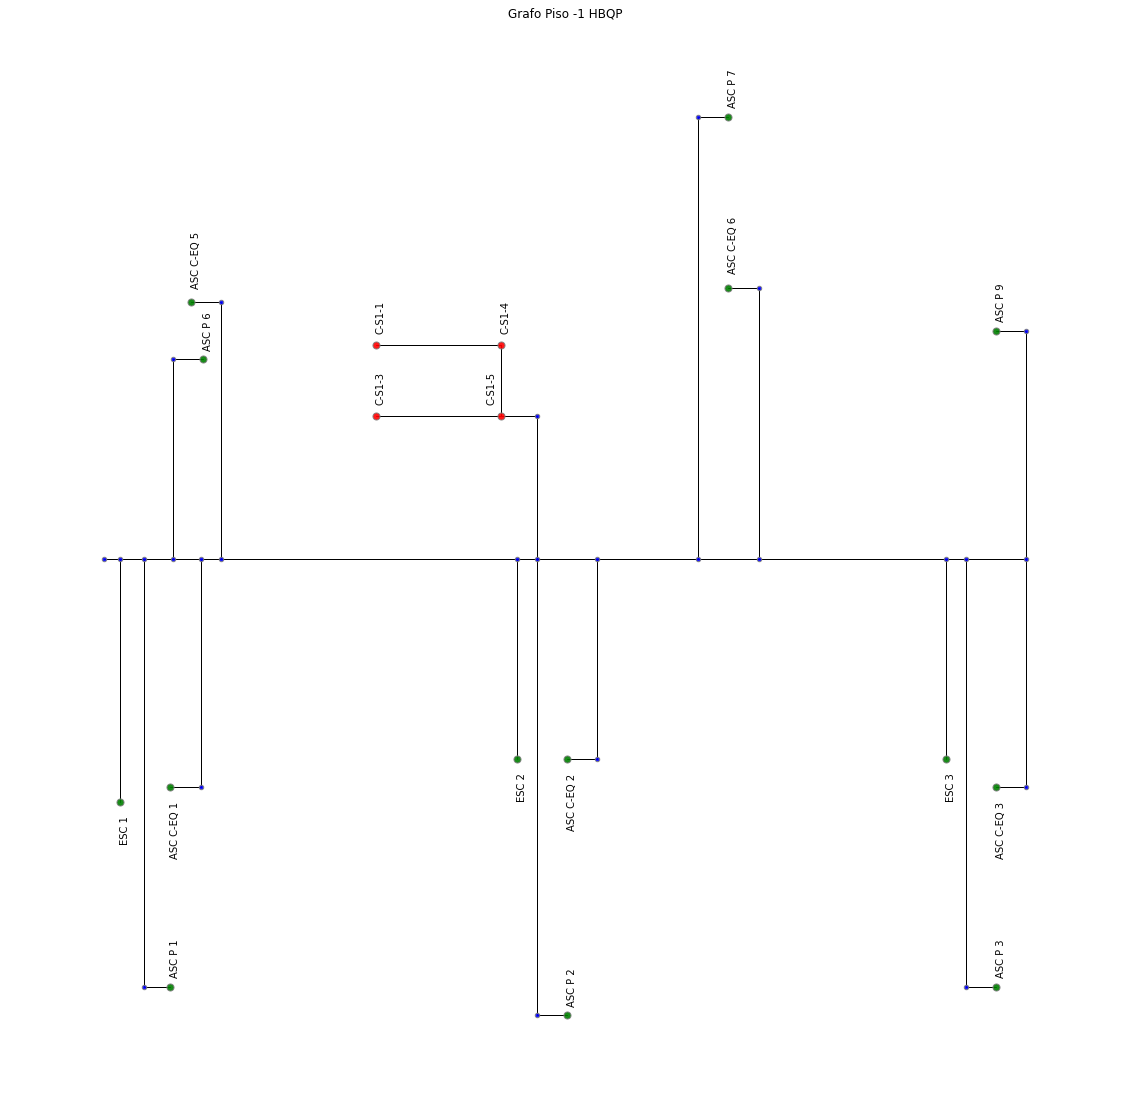

In [14]:
# generamos un data frame solo con los nodos para poder graficar
df_nodes = pd.DataFrame({'Nodos':G.nodes})
fig = plt.figure(figsize=(20,20))
plt.title('Grafo Piso -1 HBQP') 
# opciones que se repiten en todos los nodos
options = {"edgecolors": "tab:gray", "alpha": 0.9}
# mostramos todos los nodos de los pasillos
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[0:4]), node_color = "r",node_size=50, **options)
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[4:30]), node_color = "b",node_size=20, **options)
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[30:44]), node_color = "g",node_size=50, **options)
#for n in df_nodes['Nodos'].iloc[0:4]:
 # plt.text(pos[n][0],pos[n][1]+0.06,s=n,fontsize=10,horizontalalignment='center',rotation=90)
#for n in df_nodes['Nodos'].iloc[30:44]:
#  plt.text(pos[n][0],pos[n][1]+0.06,s=n,fontsize=10,horizontalalignment='center',rotation=90)
for n in df_nodes.Nodos.iloc[:4]:
    plt.text(pos_t[n][0],pos_t[n][1],s=n,fontsize=10,verticalalignment='center',rotation=pos_t[n][2])
for n in df_nodes.Nodos.iloc[30:44]:
    plt.text(pos_t[n][0],pos_t[n][1],s=n,fontsize=10,verticalalignment='center',rotation=pos_t[n][2])
    #print(pos[n][0])
    #print(pos_t[n][0])
    #print(pos[n][1])
    #print(pos_t[n][1])
plt.savefig("Grafo Piso -1 HBQP'.png",dpi=300,bbox_inches='tight')
plt.show()
